Best Params (CV): {'C': 10, 'gamma': 0.01}

=== SVM (RBF) — Test Metrics ===
Accuracy : 0.9825
Precision: 0.9861
Recall   : 0.9861
F1-Score : 0.9861
ROC-AUC  : 0.9977

Confusion Matrix:
 [[41  1]
 [ 1 71]]

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98        42
           1       0.99      0.99      0.99        72

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



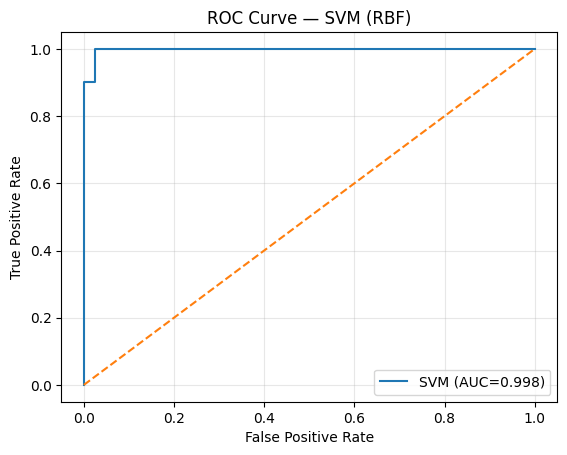

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, classification_report, roc_auc_score, roc_curve
)

# 2) Load dataset (binary classification)
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target, name="target")  # 1 = malignant? (Check dataset doc: in this set, 0=malignant, 1=benign)

# 3) Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42, stratify=y
)

# 4) Standardize features (important for SVMs)
scaler = StandardScaler()
X_train_sc = scaler.fit_transform(X_train)
X_test_sc = scaler.transform(X_test)

# 5) Define model
svm = SVC(kernel='rbf', probability=True, random_state=42)

# 6) Hyperparameter grid & tuning
param_grid = {
    "C": [0.1, 1, 10, 100],
    "gamma": ["scale", 0.01, 0.001, 0.0001]
}
grid = GridSearchCV(
    estimator=svm,
    param_grid=param_grid,
    scoring='f1',          # you can change to 'accuracy' or 'roc_auc' as needed
    cv=5,
    n_jobs=-1,
    verbose=0
)
grid.fit(X_train_sc, y_train)

print("Best Params (CV):", grid.best_params_)
best_svm = grid.best_estimator_

# 7) Train final model & predict
best_svm.fit(X_train_sc, y_train)
y_pred = best_svm.predict(X_test_sc)
y_prob = best_svm.predict_proba(X_test_sc)[:, 1]

# 8) Evaluate
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred, zero_division=0)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_prob)
cm = confusion_matrix(y_test, y_pred)

print("\n=== SVM (RBF) — Test Metrics ===")
print(f"Accuracy : {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall   : {rec:.4f}")
print(f"F1-Score : {f1:.4f}")
print(f"ROC-AUC  : {auc:.4f}")

print("\nConfusion Matrix:\n", cm)
print("\nClassification Report:\n", classification_report(y_test, y_pred, zero_division=0))

# 9) Plot ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.figure()
plt.plot(fpr, tpr, label=f"SVM (AUC={auc:.3f})")
plt.plot([0, 1], [0, 1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve — SVM (RBF)")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()